# Assignment #1
## Introduction:
- **To explore** relationships between loan_amount, annual_incomes, term (No. of payments on loans), purpose/title of loans and home_ownership status. The outcome will be to place bechmark values of loans requests depending on their annual income, purpose and home_ownership. 

### **Goal -- insights to gather:**
    To explore the relationships & insights between; 
        - loan_amounts
        - term (No. of payment on loan), 
        - the annual_income
        - purpose/title of the loan
        - home_ownership

## Agenda/structure of notebook:
1. Ingesting LendingClub Data (Load Data using output from previous session) 

2. **Data Cleaning**
- 2a. Clean fields with string dataType
- 2b. Investigate float fields & Create **#Feature Engineer#** a new feature using two variables (to place multiple IDs or loan_listings with annual_inc on equal-footing)
- 2c. Remove Outliers 
    - 2c1.  Using Z-score and finding threshold/standard_deviation limit
	- 2c2. Using BoxPlot to remove Outliers from new feature
 

3. **Exploratory Data Analysis (EDA)**
- 3a. Summary Statistics for fields with float dataTypes, incl additional **#Feature Engineer#** log_scaled features
- 3b. Correlations & Heatmaps


4. **Data Visualisations**
- 4a. BarPlot - Investigate the most popular 'category' purpose for a loan, and how these relates to 'home_ownership'; **#Feature Eningeer#** to aggregate data.
- 4b. BarPlot - Invesitage average loan amount to annual income ratio across loan purposes and home ownership;
- 4c. BarPlot & PairPlot - #Feature Engineer# the averages across all numerical variables & investigate multiple relationships between them; **#Feature Eningeer#** to aggregate data.

5. **Insights & Conclusions**



------------------------------

### Assignment #1:
- In this assignment, I will be taking data cleaning and exploratory data analysis further and uncover **at least 2 additional actionable insights** as an outcome of EDA.
Tips:
    - Feel free to drop or generate additional features in doing so.

    - How can the business leverage the insights uncovered and how can the impact of your insight be measured?

**Submission:** Submit your notebook with the EDA and insights documented.

**Evaluation Criteria:**

-   Depth of analysis and insights derived.
-   Relevance and feasibility of the actionable insights.
-   Clarity and thoroughness of code and explanations.

Tips: don't be afraid to be creative, and go past what was covered in this session (e.g. additional plot types etc.)

------------------------------




### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, zscore

pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)

# Working locally on Jupyter Notebook, parent folder is one folder up (using the folder structure shared at the beginning of the course)
path_python_material = ".."

---

1\. Ingesting Lending Club Data.
----------------------------------------

In [2]:
# Read data that was exported from previous session
df = pd.read_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif3.csv")

# print shape of dataFrame
(print(f"shape of df = {df.shape}"))

df.head()

shape of df = (100000, 159)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,last_pymnt_amnt_log,last_pymnt_amnt_capped,loan_id_extracted,emp_title_clean,emp_title_manager,Job Title,Category,int_rate_clean,interest_per_loan_amnt,term_numeric,debt_to_income,loan_amnt_log,grade_encoded,loan_amnt_std,annual_inc_std,loan_amnt_norm,annual_inc_norm
0,167338079,4000.0,4000.0,4000.0,36 months,13.08,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=167338079,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,4.912140,134.93,167338079,cashier,False,NaN,NaN,13.08,156960.0,36.0,0.083333,8.294300,1,-1.196895,-0.367206,0.083969,0.004364
1,71016917,24000.0,24000.0,24000.0,60 months,9.16,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=71016917,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1



### A. Only taking the fields that we are interested in for our goal 'relationships between loans, annual_inc and purpose of loan'.
<br> - id : primary_index [uniquess for loan listing ]
<br> - loan_amnt	
<br> - term 
<br> - home_ownership
<br> - annual_inc 
<br> - purpose	
<br> - title

From the Data-Dictionary :

<br> *funded_amnt*	        = The total amount committed to that loan at that point in time.

<br> *funded_amnt_inv*	        = The total amount committed by investors for that loan at that point in time.

<br> *loan_amnt*	        = The listed amount of the loan applied for by the borrower. 
                                If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<br> We can see from above, 'loan_amnt' is the field we want to use for our EDA to find relationships & Insights between annual_income, reason for loan, home_ownership, 
since it entails the loan applied by the borrower, and any reductions to the amount will be reflcted in this field.
Hence, we can drop ['funded_amnt', 'funded_amnt_inv']

In [3]:
# Listing our fields we are interested in
fields_for_eda = [
'id',
'loan_amnt',	
'term',
'home_ownership',
'annual_inc',
'purpose',
'title'
]

# createing a new dataFrame with fields only interested in, and dropping any duplicate values
df_clean = df[fields_for_eda].drop_duplicates().reset_index(drop=True)

# print shape of dataFrame
(print(f"shape of df_eda = {df_clean.shape}"))

df_clean.head(5)

shape of df_eda = (100000, 7)


,id,loan_amnt,term,home_ownership,annual_inc,purpose,title
0,167338079,4000.0,36 months,MORTGAGE,48000.0,home_improvement,Home improvement
1,71016917,24000.0,60 months,RENT,57000.0,credit_card,Credit card refinancing
2,39589826,5000.0,36 months,MORTGAGE,55000.0,credit_card,Credit card refinancing
3,134798709,24000.0,60 months,MORTGAGE,43500.0,debt_consolidation,Debt consolidation
4,127097355,14000.0,60 months,MORTGAGE,48000.0,debt_consolidation,Debt consolidation


---

# 2. Perform Data Cleaning.

### A. Clean Fields with string dataType.	
        - term : (extracting number) to be dataType = int -> will be categorical
        - home_ownership : ensure they are all upper_case
        - purpose : Check if there is a 1-to-1 relationship with field 'title' or if it has less unique categorical values than 'title'	
        - title : Check if there is a 1-to-1 relationship with field 'purpose' or if it has less unique categorical values than 'purpose'	

### B. Create a new feature using two variables (to place multiple IDs/loan_listings with annual_inc on equal-footing).
        - loan_amnt_annual_inc_ratio = round(loan_amnt / annual_inc, 4) - 4 s.f.

### C. Remove Outliers
        - C1. Using Z-score and finding threshold/standard_deviation limit
        - C2. Using BoxPlot to remove Outliers from new feature

----------------------------------------

## 2- A. Cleaning String dataType fields
- Extracting number of months from term, datatype (float) using regex

In [4]:
# Extracting number of months from term, datatype (float) using regu;ar expressions
df_clean['term'] = df_clean['term'].str.replace(r"\D", "", regex=True).astype(float)

display(df_clean['term'].value_counts())

df_clean

36.0    70384
60.0    29616
Name: term, dtype: int64

,id,loan_amnt,term,home_ownership,annual_inc,purpose,title
0,167338079,4000.0,36.0,MORTGAGE,48000.0,home_improvement,Home improvement
1,71016917,24000.0,60.0,RENT,57000.0,credit_card,Credit card refinancing
2,39589826,5000.0,36.0,MORTGAGE,55000.0,credit_card,Credit card refinancing
3,134798709,24000.0,60.0,MORTGAGE,43500.0,debt_consolidation,Debt consolidation
4,127097355,14000.0,60.0,MORTGAGE,48000.0,debt_consolidation,Debt consolidation
...,...,...,...,...,...,...,...
99995,85585726,3300.0,36.0,MORTGAGE,60000.0,other,Other
99996,68826226,6000.0,36.0,RENT,150000.0,major_purchase,Major purchase
99997,83837196,10000.0,60.0,RENT,48000.0,debt_consolidation,Debt consolidation
99998,158432991,10625.0,36.0,MORTGAGE,90000.0,debt_consolidation,Debt consolidation


## 2- A. Cleaning String fields - Continued !

- Check for 1-to-1 relationship between fields 'purpose'  and 'title'

- from the Data-Dictionary :
- purpose   = A category provided by the borrower for the loan request. 
- title 	= The loan title provided by the borrower

- We can see from above, 'purpose' is the Category to use for our relationships & insights between loan_amnt, annual_income, reason for loan.

- below is the code to confirm this on a data-level

In [5]:

# Even though, we should use 'purpose', based on the Data Dictionary, we can use the code below to ensure this is correct
is_one_to_one = df_clean.drop_duplicates(subset=["purpose", "title"]).shape[0] == df_clean["purpose"].nunique() == df_clean["title"].nunique()
print(f"Is there a one_to_one relationship ? = {is_one_to_one}")

# since the one_to_one relationship is False, we shall see which field has the least amount of unique values/categories
print(f"Num. of unique 'purpose' categories {len(df_clean['purpose'].unique())}")
print(f"Num. of unique 'title' categories {len(df_clean['title'].unique())}")

# proof to use 'purpose' field
print("")
print("proof to use 'purpose' field .. uses less unique categorical values")
display(df_clean[["purpose", "title"]].drop_duplicates().sort_values(by=['purpose']))


# Hence, we will drop the field "title"
df_clean = df_clean.drop(['title'] , axis=1).drop_duplicates().reset_index(drop=True)

df_clean

Is there a one_to_one relationship ? = False
Num. of unique 'purpose' categories 14
Num. of unique 'title' categories 3456

proof to use 'purpose' field .. uses less unique categorical values


,purpose,title
73731,car,Heavy Chevy
30998,car,van loan
19157,car,Car Loan
69678,car,Triumph Bike Project
31535,car,myauto
...,...,...
41555,wedding,Wedding2013
5296,wedding,Ryan Loan
72911,wedding,Wedding Plans
48962,wedding,Personal loan


,id,loan_amnt,term,home_ownership,annual_inc,purpose
0,167338079,4000.0,36.0,MORTGAGE,48000.0,home_improvement
1,71016917,24000.0,60.0,RENT,57000.0,credit_card
2,39589826,5000.0,36.0,MORTGAGE,55000.0,credit_card
3,134798709,24000.0,60.0,MORTGAGE,43500.0,debt_consolidation
4,127097355,14000.0,60.0,MORTGAGE,48000.0,debt_consolidation
...,...,...,...,...,...,...
99995,85585726,3300.0,36.0,MORTGAGE,60000.0,other
99996,68826226,6000.0,36.0,RENT,150000.0,major_purchase
99997,83837196,10000.0,60.0,RENT,48000.0,debt_consolidation
99998,158432991,10625.0,36.0,MORTGAGE,90000.0,debt_consolidation


#### NOTE: 
- To ensure our two category fields ['purpose','home_ownership'] are unique and have the same string format

In [6]:
print(" ----- ")
print('home_ownership unique values :')
display(df_clean['home_ownership'].unique())
display(df_clean['home_ownership'].value_counts())


print(" ----- ")
print('purpose unique values :')
display(df_clean['purpose'].unique())
display(df_clean['purpose'].value_counts())

 ----- 
home_ownership unique values :


array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

MORTGAGE    49149
RENT        39472
OWN         11238
ANY           125
OTHER          12
NONE            4
Name: home_ownership, dtype: int64

 ----- 
purpose unique values :


array(['home_improvement', 'credit_card', 'debt_consolidation', 'moving',
       'vacation', 'other', 'car', 'medical', 'house', 'small_business',
       'major_purchase', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

debt_consolidation    55647
credit_card           23954
home_improvement       6673
other                  6096
major_purchase         2223
medical                1177
small_business         1061
car                     987
house                   697
vacation                686
moving                  641
wedding                  87
renewable_energy         54
educational              17
Name: purpose, dtype: int64

#### Observation
- We can see the values for the two category fields above are consistent in their format

---
## 2- B. Investigate float fields & Create #Feature Engineer# a new feature using two variables (to place multiple IDs/loan_listings with annual_inc on equal-footing)

- Quick statistical summary for fields 'loan_amnt' and 'annual_inc'

- #Feature Engineer# - loan_amnt_annual_inc_ratio = round(loan_amnt / annual_inc, 4) - 4 s.f.

- 4 s.f. for those requesting/receiving a very small loan (~>1%) relative to their annual_income



In [7]:
# Quick statistical details for ['loan_amnt' , 'annual_inc']

for f in ['loan_amnt', 'annual_inc']:
    display(df_clean[f].describe())

count    100000.000000
mean      15332.373000
std        9468.189883
min         700.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

count    1.000000e+05
mean     8.002918e+04
std      8.722434e+04
min      0.000000e+00
25%      4.716050e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

#### Observation
    
- We can see the 'annual_inc' field has a min = 0, and a max ~ 10 million. Also, they seem to be fully populated,

In [8]:
# Feature Engineering -  loan_amnt_annual_inc_ratio = round(loan_amnt / annual_inc, 4) - 4 s.f.
# 4 s.f. for those requesting/receiving a very small loan (~>1%) relative to their annual_income

df_clean['loan_amnt_annual_inc_ratio'] = round( df_clean['loan_amnt']/df_clean['annual_inc'] , 4)

df_clean


,id,loan_amnt,term,home_ownership,annual_inc,purpose,loan_amnt_annual_inc_ratio
0,167338079,4000.0,36.0,MORTGAGE,48000.0,home_improvement,0.0833
1,71016917,24000.0,60.0,RENT,57000.0,credit_card,0.4211
2,39589826,5000.0,36.0,MORTGAGE,55000.0,credit_card,0.0909
3,134798709,24000.0,60.0,MORTGAGE,43500.0,debt_consolidation,0.5517
4,127097355,14000.0,60.0,MORTGAGE,48000.0,debt_consolidation,0.2917
...,...,...,...,...,...,...,...
99995,85585726,3300.0,36.0,MORTGAGE,60000.0,other,0.0550
99996,68826226,6000.0,36.0,RENT,150000.0,major_purchase,0.0400
99997,83837196,10000.0,60.0,RENT,48000.0,debt_consolidation,0.2083
99998,158432991,10625.0,36.0,MORTGAGE,90000.0,debt_consolidation,0.1181


---
## 2- C. Removing Outliers
- Using Z-score and finding threshold/standard_deviation limit
- Using BoxPlot to remove Outliers from new feature



#### 2c1 : Removing outliers using Z-score

- We will investigate the data distribution of the float fields, and remove any outliers using The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean.

From [investopedia](https://www.investopedia.com/terms/z/zscore.asp#:~:text=Understanding%20Z%2DScore,-Z%2Dscore%20is&text=It%20indicates%20how%20many%20standard,standard%20deviation%20from%20the%20mean.):
> Z-score is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution.

> If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

- We are going to investigate its threshold up to 3*standard_deviation, to see if it contains any outliers

- Then investigate the other numerical fields at this threshold

In [9]:
for threshold in range(200, 301, 25):
    # Calculate Z-scores for numerical columns
    z_scores = np.abs(stats.zscore(df_clean.select_dtypes(include=[np.number])))

    # Define a threshold for identifying outliers
    thresh = threshold/100

    print(f"Threshold == {thresh}")

    # How many outliers identified for each numerical columns?
    gt_thresh = z_scores > thresh
    outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
    outlier_volume.sort_values(by = "num_outliers"
                            , ascending= False)
    
    display(outlier_volume)

Threshold == 2.0


c:\Users\cpitt\anaconda3\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,num_outliers
id,0
loan_amnt,6602
term,0
annual_inc,1267
loan_amnt_annual_inc_ratio,0


Threshold == 2.25


c:\Users\cpitt\anaconda3\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,num_outliers
id,0
loan_amnt,2605
term,0
annual_inc,1044
loan_amnt_annual_inc_ratio,0


Threshold == 2.5


c:\Users\cpitt\anaconda3\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,num_outliers
id,0
loan_amnt,2293
term,0
annual_inc,910
loan_amnt_annual_inc_ratio,0


Threshold == 2.75


c:\Users\cpitt\anaconda3\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,num_outliers
id,0
loan_amnt,0
term,0
annual_inc,666
loan_amnt_annual_inc_ratio,0


Threshold == 3.0


c:\Users\cpitt\anaconda3\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,num_outliers
id,0
loan_amnt,0
term,0
annual_inc,567
loan_amnt_annual_inc_ratio,0


### Observation

- Up to 3xStandard_deviation, almost all our float_fields/numerical_fields have zero outliers apart from 'annual_inc', also 3xStandadard_deviation is a good benchmark set my modern science.
    
- Hence, we will filter out the 'annual_inc' outliers  

In [10]:
## Z-scores for 'annual_inc'
z_scores_annual_inc = np.abs(stats.zscore(df_clean['annual_inc']))

## filter out outliers based on threshold < (3*standard_deviation)
df_clean = df_clean[(z_scores_annual_inc < 3)].drop_duplicates().reset_index(drop=True)

df_clean

,id,loan_amnt,term,home_ownership,annual_inc,purpose,loan_amnt_annual_inc_ratio
0,167338079,4000.0,36.0,MORTGAGE,48000.0,home_improvement,0.0833
1,71016917,24000.0,60.0,RENT,57000.0,credit_card,0.4211
2,39589826,5000.0,36.0,MORTGAGE,55000.0,credit_card,0.0909
3,134798709,24000.0,60.0,MORTGAGE,43500.0,debt_consolidation,0.5517
4,127097355,14000.0,60.0,MORTGAGE,48000.0,debt_consolidation,0.2917
...,...,...,...,...,...,...,...
99428,85585726,3300.0,36.0,MORTGAGE,60000.0,other,0.0550
99429,68826226,6000.0,36.0,RENT,150000.0,major_purchase,0.0400
99430,83837196,10000.0,60.0,RENT,48000.0,debt_consolidation,0.2083
99431,158432991,10625.0,36.0,MORTGAGE,90000.0,debt_consolidation,0.1181


#### 2c2 : Using BoxPlot to remove Outliers from new feature

- Use new feature 'loan_amnt_annual_inc_ratio' to explore and remove outliers using BoxPlot

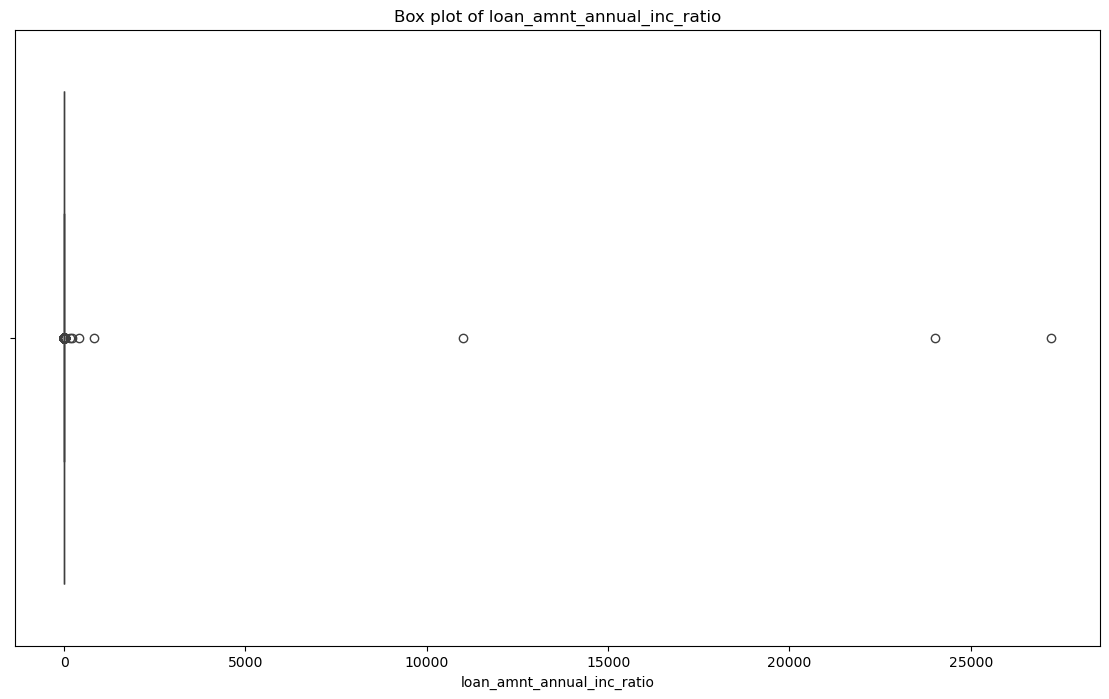

In [11]:
ratio = 'loan_amnt_annual_inc_ratio'

# Boxplots
plt.figure(figsize=(14,8))
sns.boxplot(df_clean[ratio] , orient='h')
plt.title(f'Box plot of {ratio}')
plt.show()

### Observation 
 
- There are some noticable large outliers, e.g., loan_amnt 10,000*100 % more than their annual income

In [12]:
# Look at the  > 95%-tile value of the data distribution
ratio_95 = df_clean['loan_amnt_annual_inc_ratio'].quantile(0.95) # 95%-tile is a standard benchamrk in science

print(f"Filter for values greater than 95%-tile: {ratio_95}")

display(df_clean[df_clean['loan_amnt_annual_inc_ratio'] > ratio_95].describe())

print(f"Filter for values less than 95%-tile: {ratio_95}")

display(df_clean[df_clean['loan_amnt_annual_inc_ratio'] < ratio_95].describe())

Filter for values greater than 95%-tile: 0.46


,id,loan_amnt,term,annual_inc,loan_amnt_annual_inc_ratio
count,4.937000e+03,4937.000000,4937.000000,4937.000000,4937.0000
mean,1.273153e+08,26011.418878,49.348997,42840.343759,inf
std,3.647694e+07,9205.943220,11.925142,19776.727700,NaN
min,2.224880e+05,2000.000000,36.000000,0.000000,0.4603
25%,1.186665e+08,20000.000000,36.000000,30000.000000,0.4995
50%,1.367959e+08,25500.000000,60.000000,42500.000000,0.5455
75%,1.521473e+08,34975.000000,60.000000,58000.000000,0.7129
max,1.709956e+08,40000.000000,60.000000,86029.170000,inf


Filter for values less than 95%-tile: 0.46


,id,loan_amnt,term,annual_inc,loan_amnt_annual_inc_ratio
count,9.439800e+04,94398.000000,94398.000000,94398.000000,94398.000000
mean,9.628734e+07,14699.935910,42.780144,78717.859405,0.204941
std,5.135952e+07,9088.940933,10.805292,44913.057446,0.106455
min,5.641300e+04,700.000000,36.000000,3000.000000,0.004900
25%,5.691492e+07,8000.000000,36.000000,48600.000000,0.120125
50%,1.034801e+08,12000.000000,36.000000,68287.500000,0.192300
75%,1.423388e+08,20000.000000,60.000000,97000.000000,0.280000
max,1.709875e+08,40000.000000,60.000000,341000.000000,0.459900


### Observation

- We can see 'loan_amnt_annual_income_ratio' values > 95%-tile leads to un-usual stats / outliers

- Hence, we will filter out these values, which will reduce the dataset by ~ 5% only

,id,loan_amnt,term,home_ownership,annual_inc,purpose,loan_amnt_annual_inc_ratio
0,167338079,4000.0,36.0,MORTGAGE,48000.0,home_improvement,0.0833
1,71016917,24000.0,60.0,RENT,57000.0,credit_card,0.4211
2,39589826,5000.0,36.0,MORTGAGE,55000.0,credit_card,0.0909
3,127097355,14000.0,60.0,MORTGAGE,48000.0,debt_consolidation,0.2917
4,65735255,4000.0,36.0,RENT,46000.0,moving,0.0870
...,...,...,...,...,...,...,...
94393,85585726,3300.0,36.0,MORTGAGE,60000.0,other,0.0550
94394,68826226,6000.0,36.0,RENT,150000.0,major_purchase,0.0400
94395,83837196,10000.0,60.0,RENT,48000.0,debt_consolidation,0.2083
94396,158432991,10625.0,36.0,MORTGAGE,90000.0,debt_consolidation,0.1181


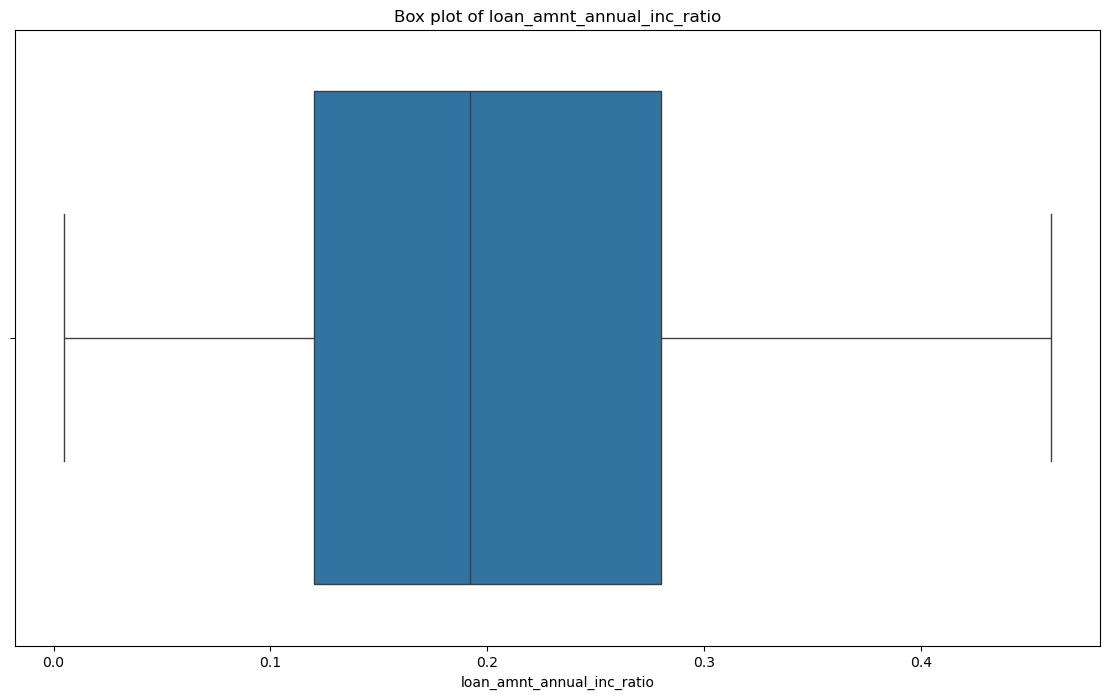

In [13]:
# Removing records with 'loan_amnt_annual_inc_ratio' greater than 95%-tile 
df_clean = df_clean[df_clean['loan_amnt_annual_inc_ratio'] < ratio_95].drop_duplicates().reset_index(drop=True)

display(df_clean)

# Boxplots
plt.figure(figsize=(14,8))
sns.boxplot(df_clean[ratio] , orient='h')
plt.title(f'Box plot of {ratio}')
plt.show()

### Observation

- From the BoxPlot, we can see the relevant outliers have been removed 

---

# 3. Exploratory Data Analysis (EDA).

### A. Summary Statistics.	
        - loan_amnt 
        - annual_inc 
        - loan_amnt_annual_inc_ratio

### B. Correlations & Heatmaps.	
----------------------------------------

## 3- A. Summary Statistics of our float-fields - Univariate analysis

Univariate analysis involves examining a single variable. Common techniques include calculating central tendency measures like mean, median, and mode.

- **Mean**: The average value
- **Median**: The middle value
- **Mode**: The most frequent value
- **Standard Deviation**: Measures the spread of the data
- **Percentiles**: Indicate the relative standing of a value in the dataset
- **Skewness** : Indicating how 'symmetrical' the data distributon is, e.g., 0 exactly symettrical


In [14]:
float_fields = ['loan_amnt',
                'annual_inc',
                'loan_amnt_annual_inc_ratio']


def summary_statistics(df, col):

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std = df[col].std()
    percentiles= df[col].quantile([0.25, 0.5, 0.75])
    skewness_value = skew(df[col])
    skewness_value_log = skew(np.log1p(df[col])) # using log1p = log(x+1) to handle/avoid log(0) = NaN values

    skew_detail = ''
    if skewness_value == 0:
        skew_detail = 'Skewness = 0: Data is perfectly symmetric.'

    elif skewness_value > 0:
        skew_detail = 'Skewness > 0: Positive skew (right skew).'

    elif skewness_value < 0:
        skew_detail ='Skewness < 0: Negative skew (left skew).'

    skew_log_detail =''
    if skewness_value_log == 0:

        skew_log_detail = 'Log Skewness = 0: Data is perfectly symmetric.'

    elif skewness_value_log > 0:
        skew_log_detail = 'Log Skewness > 0: Positive skew (right skew).'

    elif skewness_value_log < 0:
        skew_log_detail = 'Log Skewness < 0: Negative skew (left skew).'

    df_ss = pd.DataFrame({
        'column' : [f_col],
        'mean' : [mean],
        'median' : [median],
        'mode' : [mode],
        'std' : [std],
        'perc_25_50_75' : [percentiles.values],
        'skewness_value' : [skewness_value],
        'skewness_value_log' : [skewness_value_log],
        'skew_detail' : [skew_detail],
        'skew_log_detail' : [skew_log_detail]
    })

    return df_ss


# combining the summary statistics results into a dataFrame - 
df_list = []

for f_col in ['loan_amnt' , 'annual_inc']:
    df_list.append(summary_statistics(df, f_col))

print("Table of Summary Statistics for our initial ingested DataFrame")
display(pd.concat(df_list))

# combining the summary statistics results into a dataFrame - 
df_ss_list = []
# looping through our
for f_col in float_fields:
    df_ss_list.append(summary_statistics(df_clean, f_col))

print("Table of Summary Statistics for our DataFrame after removing outliers via ratio")
display(pd.concat(df_ss_list))

Table of Summary Statistics for our initial ingested DataFrame


,column,mean,median,mode,std,perc_25_50_75,skewness_value,skewness_value_log,skew_detail,skew_log_detail
0,loan_amnt,15332.373000,13000.0,10000.0,9468.189883,"[8000.0, 13000.0, 20000.0]",0.788725,-0.650530,Skewness > 0: Positive skew (right skew).,Log Skewness < 0: Negative skew (left skew).
0,annual_inc,80029.177073,66000.0,60000.0,87224.342962,"[47160.5, 66000.0, 95000.0]",47.014850,-4.618871,Skewness > 0: Positive skew (right skew).,Log Skewness < 0: Negative skew (left skew).


Table of Summary Statistics for our DataFrame after removing outliers via ratio


,column,mean,median,mode,std,perc_25_50_75,skewness_value,skewness_value_log,skew_detail,skew_log_detail
0,loan_amnt,14699.935910,12000.0000,10000.0,9088.940933,"[8000.0, 12000.0, 20000.0]",0.850277,-0.638130,Skewness > 0: Positive skew (right skew).,Log Skewness < 0: Negative skew (left skew).
0,annual_inc,78717.859405,68287.5000,60000.0,44913.057446,"[48600.0, 68287.5, 97000.0]",1.768637,-0.006583,Skewness > 0: Positive skew (right skew).,Log Skewness < 0: Negative skew (left skew).
0,loan_amnt_annual_inc_ratio,0.204941,0.1923,0.2,0.106455,"[0.120125, 0.1923, 0.28]",0.399410,0.246836,Skewness > 0: Positive skew (right skew).,Log Skewness > 0: Positive skew (right skew).


#### Observation

- We can see from our Summary Statistics dataFrames, using abs(skew) < 0.5 'Benchmark', we have ;

- ** Comparing before-after : Improvements (reduction on standard_deviation values ~ better)
- ** Comparing before-after : Improvements (reduction on skewness values for 'annual_inc' ~ better)
- ** Comparing before-after : Improvements ( < 10% increase on skewness values for 'loan_amnt' ~ worse/negligable)

#### As for the dataframes, and how it compares to when its log_scaled:
- ** Large-Right Skewness for 'annual_inc' but dropped to an acceptable value when log_scaled
- ** Acceptable Skewness for 'loan_amnt_annual_inc_ratio' and when log_scaled
- ** Greater than 0.5 for 'loan_amnt' even when log_scaled

#### Conclusion,
- ** log_scaled of these fields results in more 'symetrical' distributions



## 3- B. Correlations & Heatmaps

- Comparing those that are non_scaled and #Feature Engineer# log_scaled fields, to explore which results in best correlations

- NOTE: the field 'term' remains non_scaled/transformed, as it is categorical with values 36 and 60

Correlation Matrix


,loan_amnt,annual_inc,loan_amnt_annual_inc_ratio,term
loan_amnt,1.000000,0.500285,0.568670,0.389259
annual_inc,0.500285,1.000000,-0.299625,0.115072
loan_amnt_annual_inc_ratio,0.568670,-0.299625,1.000000,0.330340
term,0.389259,0.115072,0.330340,1.000000



Log_scaled Correlation Matrix


,loan_amnt_log,annual_inc_log,loan_amnt_annual_inc_ratio_log,term
loan_amnt_log,1.000000,0.498950,0.695607,0.409381
annual_inc_log,0.498950,1.000000,-0.275533,0.154848
loan_amnt_annual_inc_ratio_log,0.695607,-0.275533,1.000000,0.325729
term,0.409381,0.154848,0.325729,1.000000


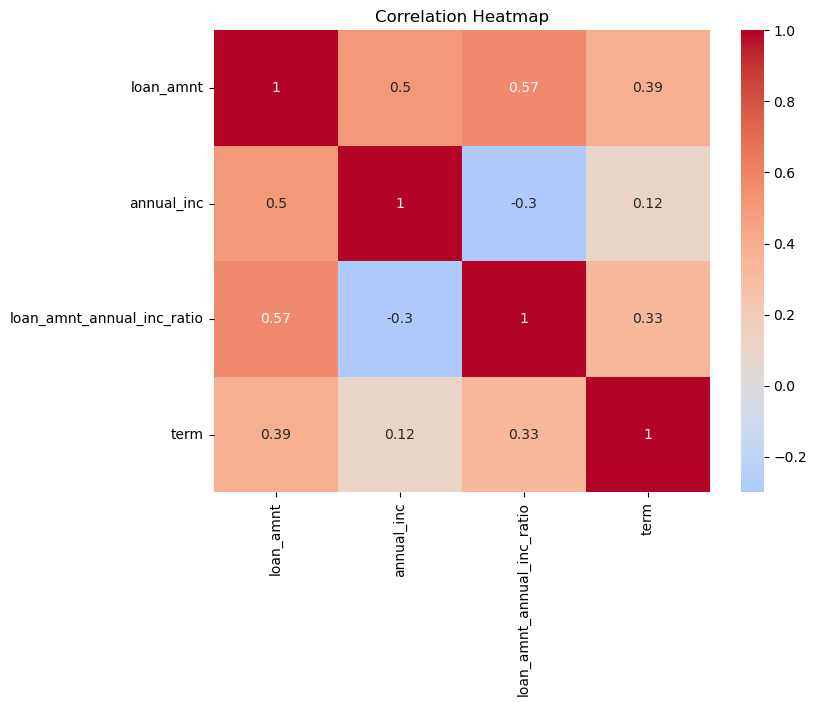

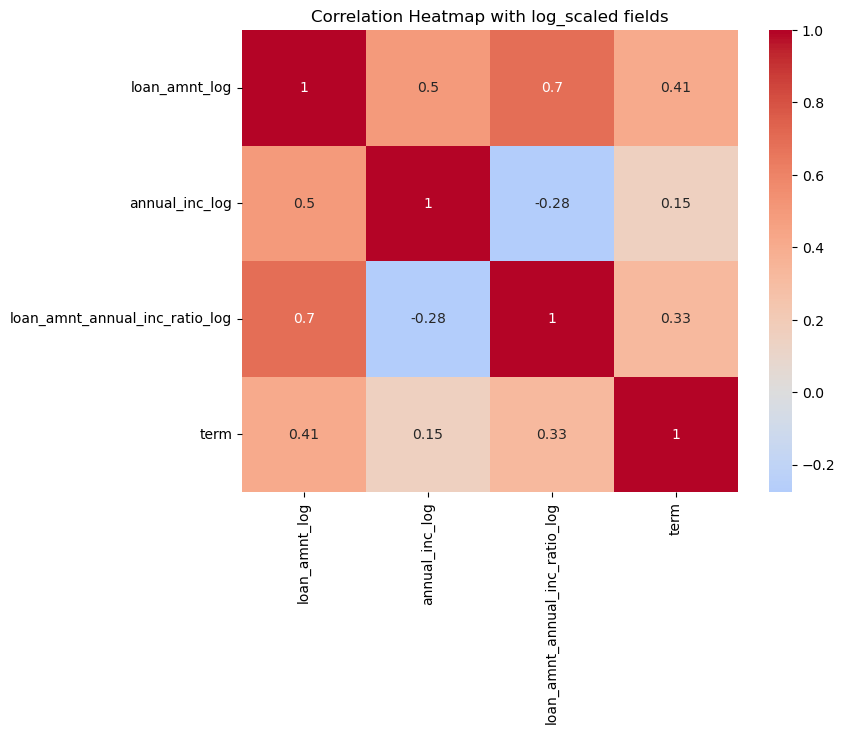

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# looping through float_fields to generate new log_scaled versions.
# #Feature Egineer# (New Features) log_scaled fields
for f_col in float_fields:

    df_clean[f_col + '_log'] = np.log(df_clean[f_col])

# Creating a list of the log_scaled fields
float_fields_with_log = [col for col in df_clean.columns if col.endswith('_log')]

print("Correlation Matrix")
display(df_clean[float_fields + ['term']].corr())

print("")
print("Log_scaled Correlation Matrix")
display(df_clean[float_fields_with_log + ['term']].corr())

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[float_fields + ['term']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[float_fields_with_log + ['term']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with log_scaled fields')
plt.show()

#### Observation

- As we can see from the tables and heatmaps above, the log_scaled fields result in stronger relationships/correlations with each other, however it doesn't tell us about any non-linear relationships. 

---

# 4- Data Visualizations.

### A. BarPlot - Investigate the most popular 'category' purpose for a loan, and how these relates to 'home_ownership'

### B. BarPlot - Invesitage average loan amount to annual income ratio across loan purposes and home ownership

### C. BarPlot & PairPlot - #Feature Engineer# the averages across all numerical variables & investigate multiple relationships between them.

----------------------------------------

## 4- A. BarPlot - Investigate the most popular 'category' purpose for a loan, and how these relates to 'home_ownership'

,purpose,count
0,debt_consolidation,52277
1,credit_card,22746
2,home_improvement,6272
3,other,5835
4,major_purchase,2096
5,medical,1142
6,small_business,986
7,car,951
8,vacation,676
9,house,637


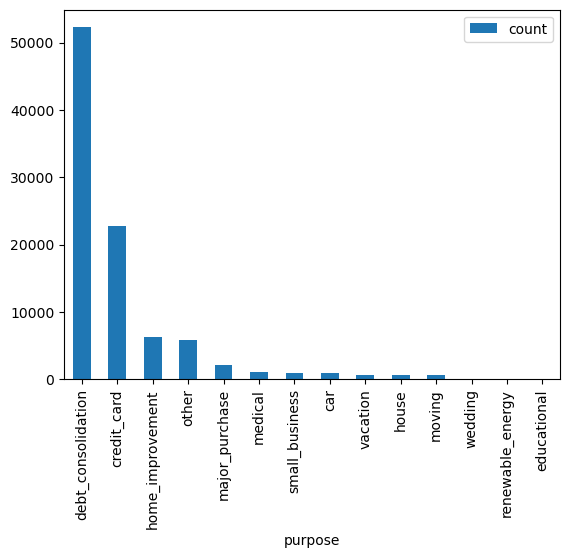

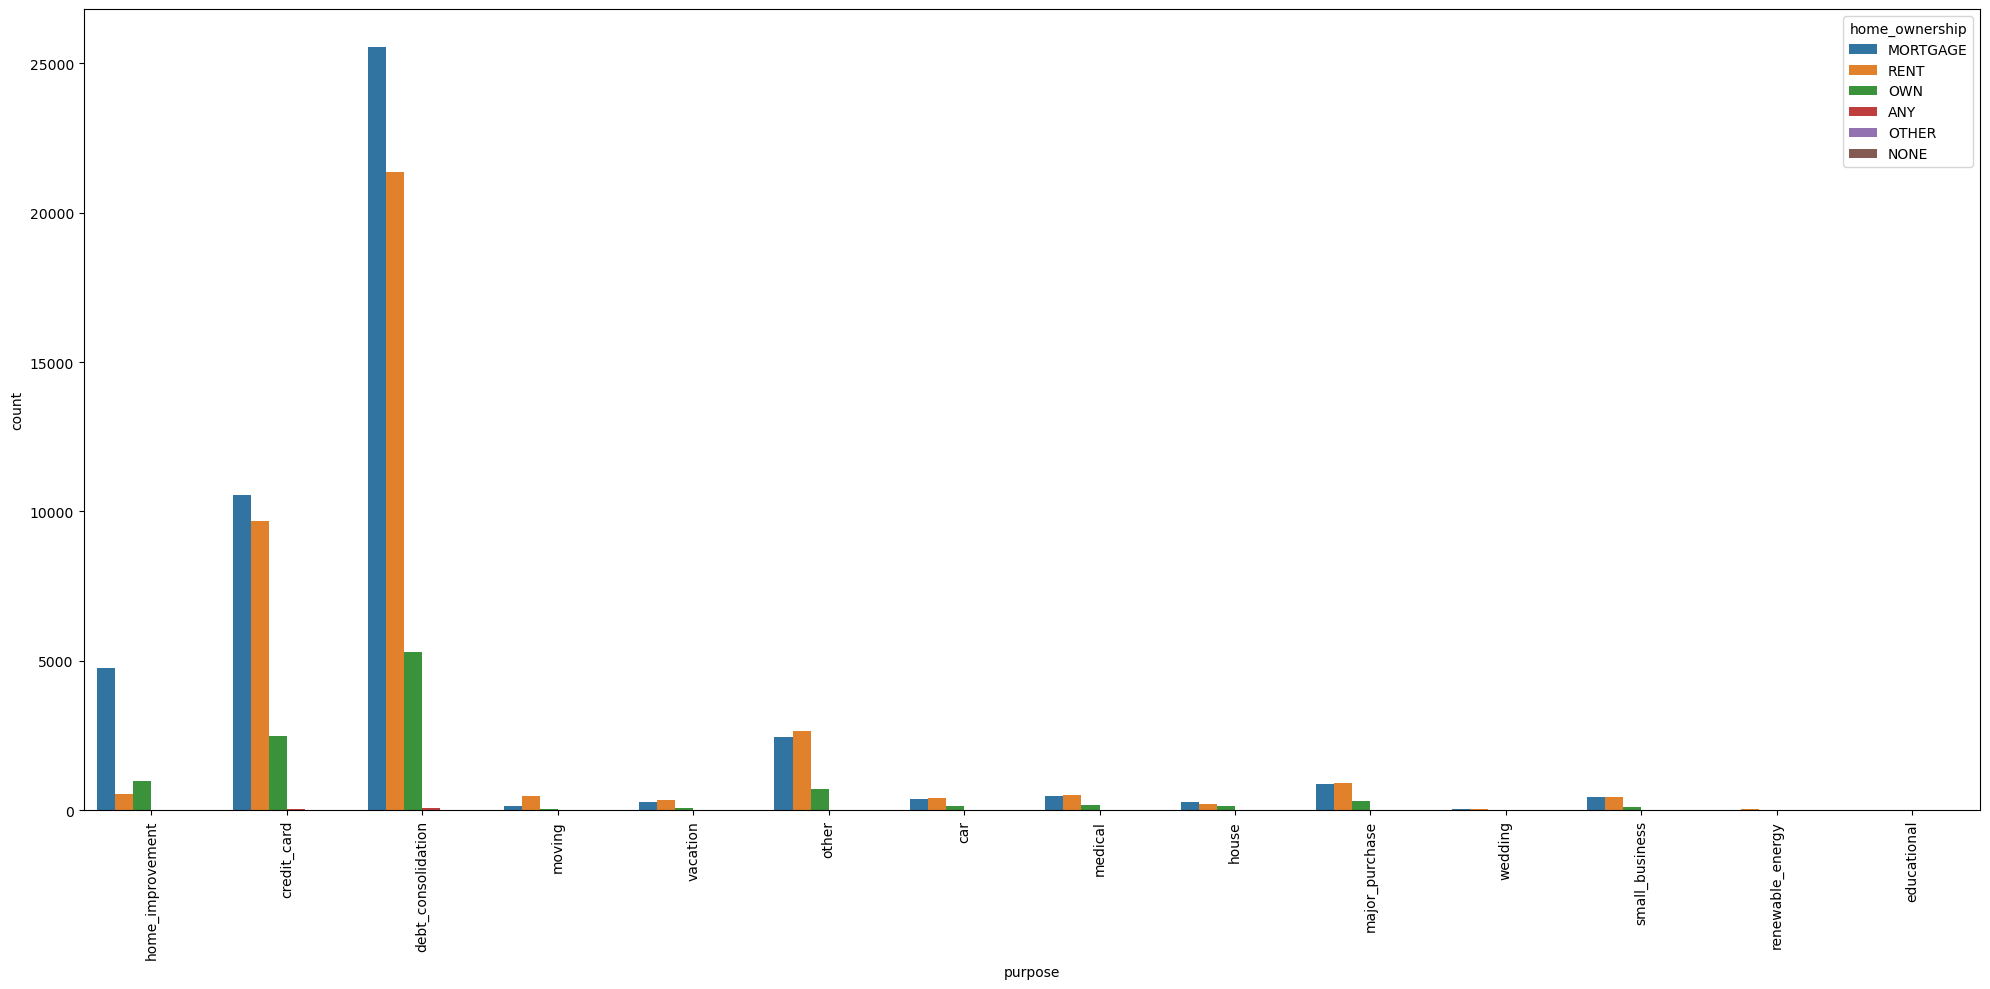

In [16]:
# To observe number of IDs or loan_listings per purpose
# This will indicate the most popular purpose for a loan
# This will create a 'New' feature showing the count per purpose
df_purpose_loan_grp = df_clean.groupby('purpose')['id'].count().reset_index().sort_values(by=['id'] , ascending=False).reset_index(drop=True)

# renaming the aggregated feature as 'count'
df_purpose_loan_grp = df_purpose_loan_grp.rename({'id':'count'} , axis=1)


display(df_purpose_loan_grp)
df_purpose_loan_grp.plot.bar(x='purpose', y='count')

# Same as bar-plot above, but with additional categorised 'home_ownership'
plt.figure(figsize=(20, 10))
sns.countplot(data=df_clean , x='purpose' , hue='home_ownership')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observation

- (Top Bar Plot) We can see the three most popular purpose for a loan are 'debt_consolidation', 'credit_card' and 'home_improvement'

- (Bottom Bar Plot) We can see the three most popular purpose for a loan are mostly dominated by those with 'home_ownership' Mortage, Rent, Own

## 4- A. BarPlot - Invesitage average loan amount to annual income ratio across loan purposes and home ownership

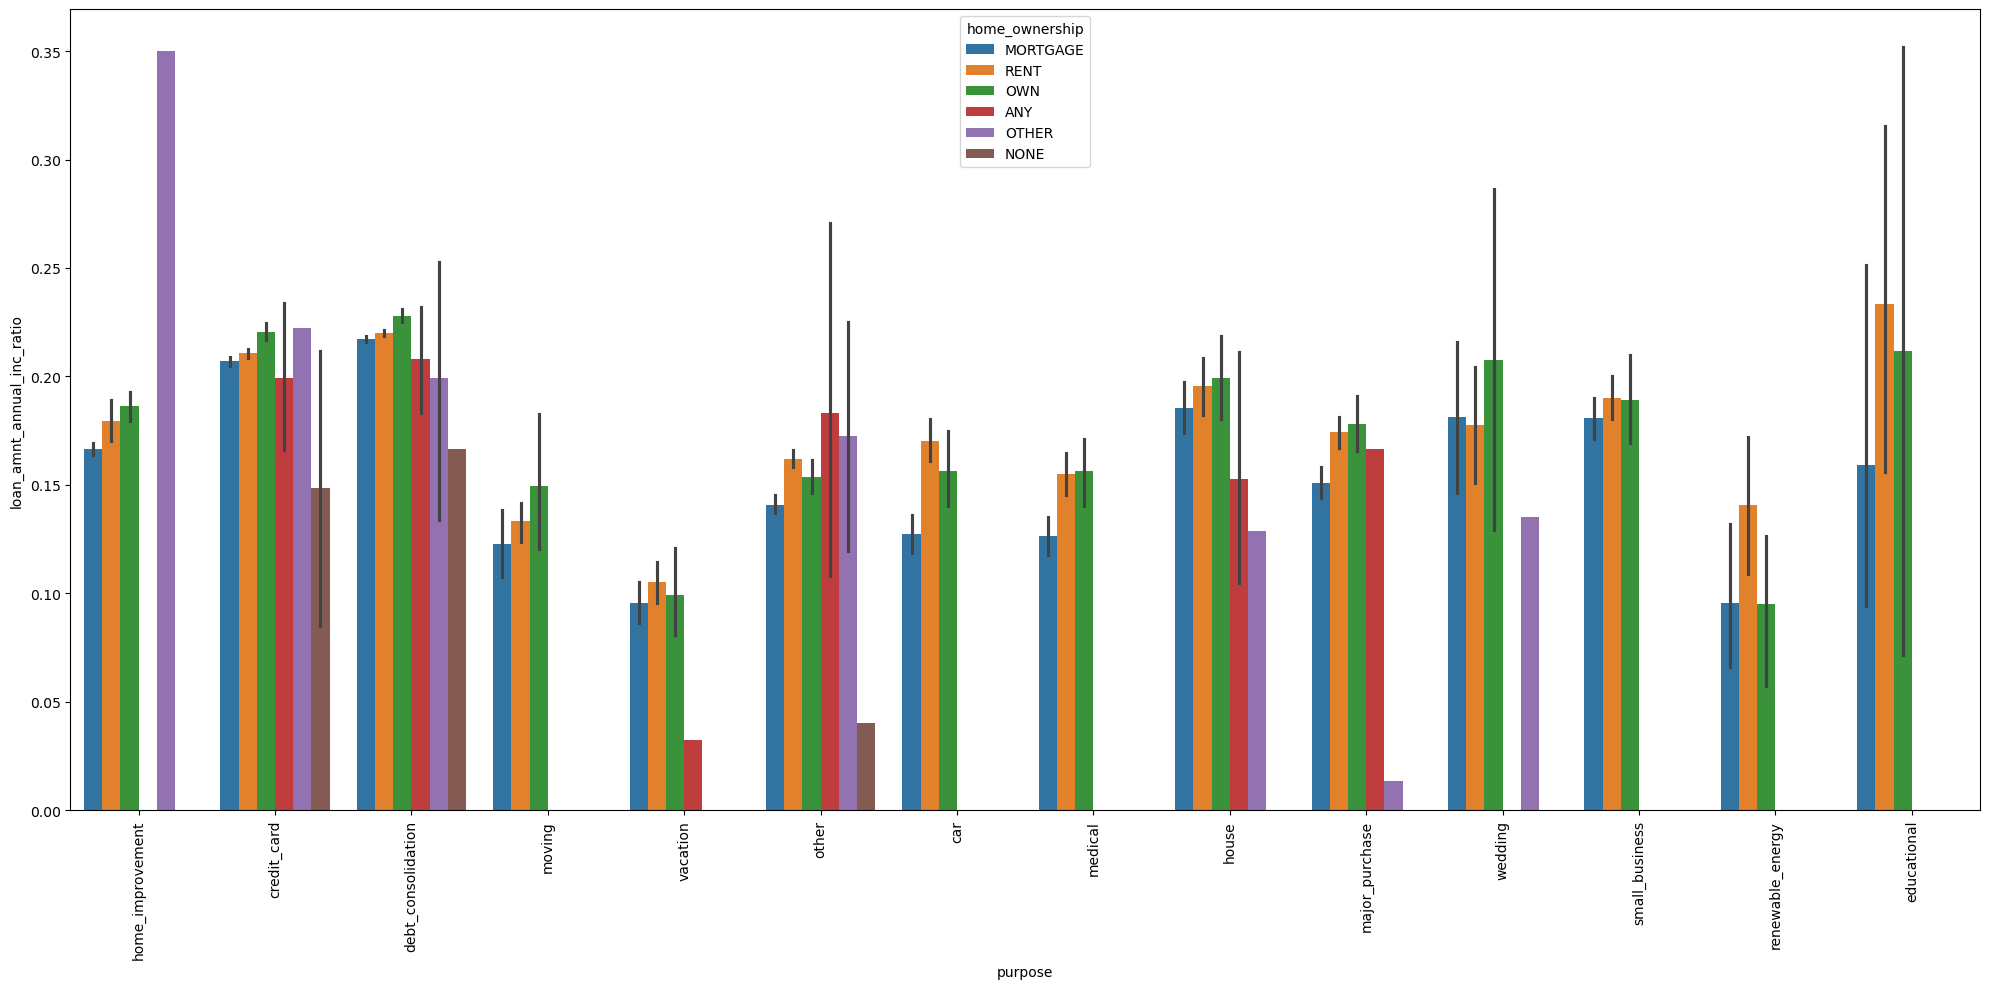

In [17]:
# Bar plot showing the average loan_amount to annual_income ratio across the purpose of the loan and their home_ownership
plt.figure(figsize=(20, 10))
sns.barplot(data=df_clean , 
            x='purpose', 
            y='loan_amnt_annual_inc_ratio' , 
            hue='home_ownership' , 
            estimator='mean')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observation

- The highest average loan_amnt_annual_inc_ratio loan_amnt borrowed relative to their income are those who request for a loan, for the purpose of home_improvement, where their home_ownership is OTHER.

- As for the most popular pupose for a loan 'debt_consolidation', those with the highest loan_amnt_annual_inc_ratio are those with home_ownership OWN (i.e., those who own their home)

## 4- C. BarPlot & PairPlot - #Feature Engineer# the averages across all numerical variables & investigate multiple relationships between them.

C:\Users\cpitt\AppData\Local\Temp\ipykernel_35548\23729897.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_purpose_loan_inc_ratio_grp = df_clean.groupby('purpose').mean().reset_index().sort_values(by=['loan_amnt_annual_inc_ratio'] , ascending=False).reset_index(drop=True)


,purpose,loan_amnt_annual_inc_ratio,loan_amnt,annual_inc,term
0,debt_consolidation,0.219519,15686.969413,78094.449398,43.561719
1,credit_card,0.210039,15005.099798,78552.018065,42.415194
2,educational,0.195788,7338.235294,45776.588235,37.411765
3,house,0.191031,14596.978022,83984.976468,43.083203
4,small_business,0.185585,15813.184584,95141.802941,41.354970
5,wedding,0.180536,11054.651163,65212.430698,40.465116
6,home_improvement,0.170851,13958.785077,90684.747385,42.581633
7,major_purchase,0.165088,11798.687977,77982.468516,41.232824
8,other,0.152196,10129.841474,73359.065392,40.084319
9,car,0.150824,9161.671924,70326.907823,40.416404


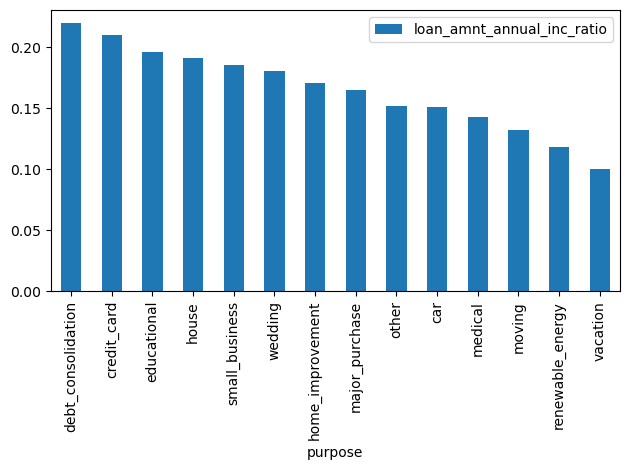

In [18]:
# Aggregating / Grouping on purpose for loans, and taking the average across all the numerical fields
df_purpose_loan_inc_ratio_grp = df_clean.groupby('purpose').mean().reset_index().sort_values(by=['loan_amnt_annual_inc_ratio'] , ascending=False).reset_index(drop=True)

display(df_purpose_loan_inc_ratio_grp[['purpose' , 'loan_amnt_annual_inc_ratio' , 'loan_amnt' , 'annual_inc' , 'term']])
df_purpose_loan_inc_ratio_grp.plot.bar(x='purpose', y='loan_amnt_annual_inc_ratio')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




#### Observation

- As for the most popular purpose of loan 'debt_consolidation', overall has the highest average when combining 'home_owership' categories.

- However, looking at the distribution of values across all purposes, it appears loan amounts are usually ~15% of a person's annual income.

- Next, we will take this aggregated dataset, and explore a PairPlot, to see the relationships between the numerical variables while categorised via 'purpose'

<Figure size 2000x1000 with 0 Axes>

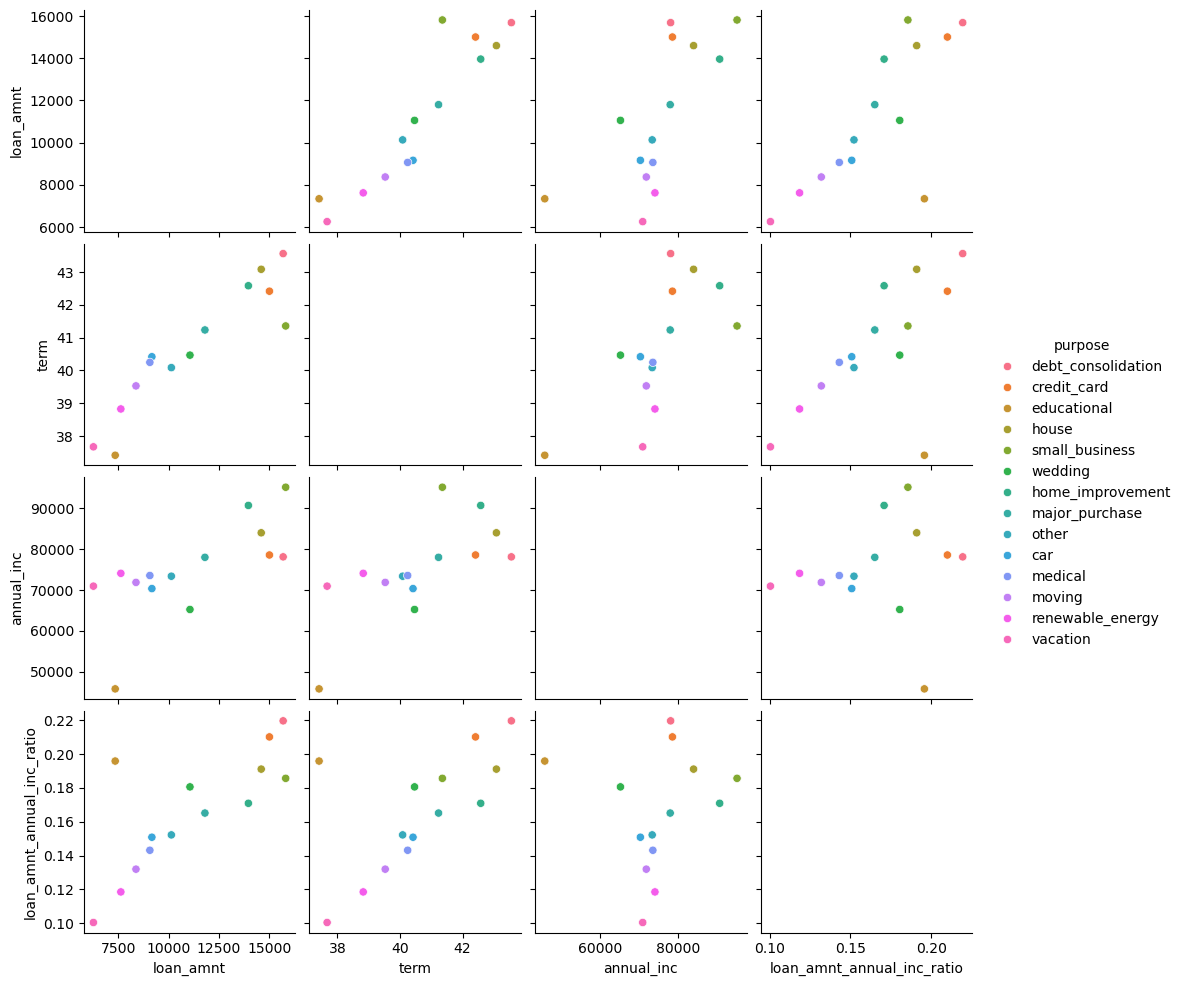

In [19]:
# From our aggregated dataset above, where we take the average across all numerical fields,
# We can perform a pairplot, to see where the purpose of the loan is located on a scatter plot 
# across multiple variable relationships

plt.figure(figsize=(20, 10))

sns.pairplot(
    df_purpose_loan_inc_ratio_grp[[
        'loan_amnt', 
        'term', 
        'annual_inc',
        'loan_amnt_annual_inc_ratio', 
        'purpose']], 
        hue="purpose"
        )

#plt.tight_layout()
plt.show()

#### Observations

- From the Pairplot, across multiple variable relationships, the popular purpose for a loan 'debt_consolidation' appears to cluster/be located in the top-right, while purpose for loan such as vacation or renewable_energy are in the bottom-left

- The Pairplot also shows us a relationship of the higher the term (Months) proportional higher loan_amount_annual_income_ratio

# 6. Insights & Conclusions

- The process of Data Cleaning, EDA, with the creation of new features (mainly loan_amnt_annual_inc_ratio), results into an affective feature for removing Outliers via the BoxPlot method, as it cleary indicated spurious values. This lead to improving the quality of our dataset when comparing from the initial ingested to the dataset after removing outliers, as reflected within the EDA - summary statistics.
As for EDA, the summary statistics showed us a reduction in the standard_deviation. In Addition, the skewness values also became more 'symmetric' after undergoing log_scaling transformation. This also reflected into better correlations / relationships between the variables.


- Via our Visualisations, we saw the most popular purpose for a loan was 'debt_consolidation', usually those that have a mortgage, borrowing average ~ 22% of their annual income.

- However, we notice the largest loan amount relative to annual income are those with a loan peupose of 'home_improvements' with home_ownership being OTHER.

- To Conclude, the additional actionable insights outcomes via EDA/Visualizations;

    - #Feature Engineer# features such as loan_amnt_annual_inc_ratio, places every loan_listing on equal-footing, and enhaces outliers, making it easy to remove these to improve our dataset.

    - Summary-Statistics showed us the data distribution of numerical fields are more 'symmetrical' (i.e., more normal distributed) when they are #Feature Engineer# to log_scale, also resulting in between correlations.

    - Visualizations gave a clear picture that the majority of loans are for the purpose of 'debt_consolidation' for,  borowwing ~22% of their annual income. 

    - Visualizations - PairPlot also showed us the relationships relative to 'term', and highlighted those with loan purpose 'debt_consolidation' appear to borrow more, have a high annual income, with a larger term (i.e., The number of payments on the loan).

- How can the business leverage the insights uncovered and how it can impact the insights measured ?

    - The business can use the loan_amount_annual_inc ratio as a benchmark for when someone applies for a loan, depending on the purpose of the loan and their home_owernship status.

    - The impact on my insights will reflected on detecting outliers based on loan_amount_annual_inc ratio, and then the visuals will show if the purpose of their loan falls within the 'categorical' pupose & home_ownership average range of the loan_amount_annual_inc ratio.
